For help, contact abraham

The following cells are a parallelized version of the script. This cell is a header to help you check your cropping. 

loading file 0


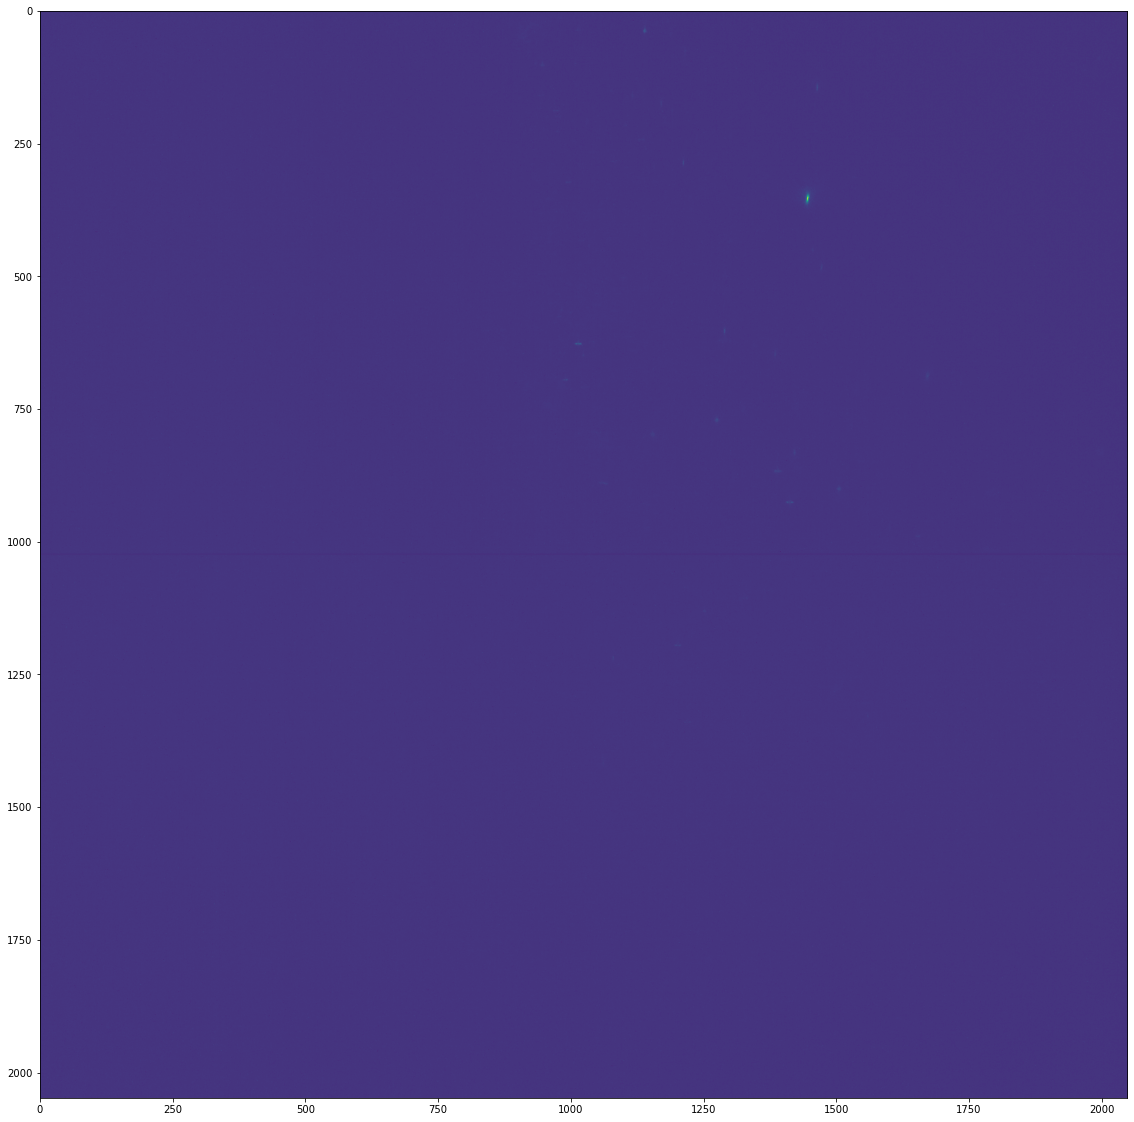

In [3]:
import math
import h5py
import numpy
from PIL import Image , ImageFilter
import os
import pyklb
import csv
import matplotlib.pyplot as plt

######################### User Inputs here #################################################

#Example of how to write out path_list. Each path is a string, surrounded by '' and followed by a comma, and a new line. Tab in will be automatic
#Square brackets surround the whole thing. This is a python list.

#path_list = ['/mnt/lowrie-posfailab/Active/210811_CSGH2B_4_5/2021-08-11_154647/raw/stack_0_channel_0_obj_left/',
#            '/mnt/lowrie-posfailab/Active/210811_CSGH2B_4_5/2021-08-11_154647/raw/stack_0_channel_1_obj_left/',
#            '/mnt/lowrie-posfailab/Active/210811_CSGH2B_4_5/2021-08-11_154647/raw/stack_0_channel_2_obj_left/']

#Hey! Is this crashing? Switch your forward slashes (\) to backslash (/). Why windows uses the Escape character (\) like it's part of a path, we will never know...
path_list = ['Z:/Maddy/220819_YAP_H2B_mTmG_whole_embryo/bead_image_0.5um_stacks/raw/stack_1_channel_0_obj_left',
             'Z:/Maddy/220819_YAP_H2B_mTmG_whole_embryo/bead_image_0.5um_stacks_position2/raw/stack_2_channel_0_obj_left',
             'Z:/Maddy/220819_YAP_H2B_mTmG_whole_embryo/bead_image_1um_stacks/raw/stack_1_channel_0_obj_left',
             'Z:/Maddy/220819_YAP_H2B_mTmG_whole_embryo/bead_image_1um_stacks_position2/raw/stack_2_channel_0_obj_left',
             'Z:/Maddy/220827_YAP_mat_vs_pat/2022-08-29_194558/raw/stack_0_channel_0_obj_left',
             'Z:/Maddy/220827_YAP_mat_vs_pat/2022-08-29_194428/raw/stack_0_channel_0_obj_left',
             'Z:/Maddy/220902_H2B_mTmG_background/2022-09-02_142513/raw/stack_6_channel_0_obj_left',
             'Z:/Maddy/220902_H2B_mTmG_background/2022-09-02_142645/raw/stack_6_channel_0_obj_left']
             
             
channel_base_name1 = 'Cam_Long_'
channel_base_name2 = 'Cam_Short_'

timestep = 900 #timestep for aquisition in seconds

foreground = True #is the only thing running? If no, set to False.


doXYCrop = False #do you want to crop. 1 or True is crop, 0 or False is don't. 

isDotH5 = False #True #is this file in the old .h5 format rather than .lux.h5? True = .h5 False = .lux.h5

#Crop position in microns from upper left corner-this is applied to ALL IMAGES, in ALL IMAGE SERIES at ALL TIMES! 
left1 = 100 #X value left
right1 = 300 #X value right

top1 = 0 #Y value top
bottom1 = 200 # Y value at bottom

ZtoDisplay = 15 #what Z plane do we want to load to check for crop
currentfilenum = 0 #file to load for crop check

######################### END USER INPUTS #################################################
path_to_files =path_list[0]

#except:
 #   pass


#converts the micron values displayed in FIJI to px values. 

left = int(math.floor(top1/.208))
top = int(math.floor(left1/.208))
bottom = int(math.floor(right1/.208))
right = int(math.floor(bottom1/.208))




# we need the size of the cropped image to be divisible by two in each dimmension for certain applications
# this checks if the size you gave is odd or even and adds a pixel if it's odd. 

if (right-left) % 2 ==0:
    pass
elif left < 2048:
    left +=1
elif left >2048:
    left = 2048
else: 
    right = right-1
    
if (bottom-top) % 2 ==0:
    pass
elif bottom <2048:
    bottom = bottom+1
elif bottom >2048:
    bottom = bottom+1
else:
    top = top-1
    
if (bottom >2048) or right>2048 or left<0 or top<0 :
    print("you're out of image bounds, try different crop values! Max is 425")
if bottom<top or left > right:
    print("Crop values can't be backwards: left and right matter! Max is 425")
   
    
#displays your cropping


if currentfilenum <= 9:
        padding = '0000'
elif currentfilenum <=99:
        padding = '000'
elif currentfilenum <=999:
        padding = '00'
elif currentfilenum <=9999:
        padding = '0'
else:
        padding = ''

print('loading file ' + str(currentfilenum))


if isDotH5:
    
    currentH5 = os.path.join(path_to_files, channel_base_name1 + padding + str(currentfilenum) + '.h5')
    try:
        fileIn2 = h5py.File(currentH5, 'r') #open current channel 2 H5 file in read mode.
    except IOError:
        print('Failed to load file: ' + currentH5)
        print('Check that your path-to-file is correct.')
        print('Did you remember to include the top and bottom-most directories?')
    pass

    fileAttributes = fileIn2[('/')]
    fileAttributes = h5py.AttributeManager(fileAttributes)


    dataset = fileIn2[('Data')]
    dataAttributes = h5py.AttributeManager(dataset)
    dataset = fileIn2[('Data')]

    dataset = numpy.ascontiguousarray(dataset[:,left:right,top:bottom])
    f = plt.figure(figsize = (20,20))
    plt.imshow(dataset[ZtoDisplay,:,:])

else:

    currentH5 = os.path.join(path_to_files, channel_base_name1 + padding + str(currentfilenum) + '.lux.h5')
    try:
        fileIn2 = h5py.File(currentH5, 'r') #open current channel 2 H5 file in read mode.
    except IOError:
        print('Failed to load file: ' + currentH5)
        print('Check that your path-to-file is correct.')
        print('Did you remember to include the top and bottom-most directories?')
        print('Are we .h5 or .lux.h5? Ensure that the parameter is set correctly:')
        print('True = .h5; False = .lux.h5')
        pass

    fileAttributes = fileIn2[('/')]
    fileAttributes = h5py.AttributeManager(fileAttributes)


    dataset = fileIn2[('Data')]
    dataAttributes = h5py.AttributeManager(dataset)
    dataset = fileIn2[('Data')]
    if doXYCrop:
        dataset = numpy.ascontiguousarray(dataset[:,left:right,top:bottom])
    else:
        dataset = numpy.ascontiguousarray(dataset)
    #img = Image.fromarray(dataset[ZtoDisplay,:,:])

    #img.show()
    #plt.rcParams['figure.figsize'] = [50, 50]
    f = plt.figure(figsize = (20,20))
    plt.imshow(dataset[ZtoDisplay,:,:])
    #n = len(range(0,dataset.shape[0],Zinterval))
    #for ZtoDisplay in range(0,dataset.shape[0],Zinterval):
    #    f.add_subplot(1,n,ZtoDisplay)
    #    plt.imshow(dataset[ZtoDisplay,:,:])



    
    

This is the parallellized portion of the script

In [2]:
currentH5

'Z:/Alana/230201_2Xchimera/2023-02-01_191007/raw/stack_0_channel_0_obj_left/Cam_Long_00000.lux.h5'

In [4]:
### Automated Script Begins ###

import pyklb # this is our .klb management package
import numpy # this imports numpy for image arraysr
import scipy # this imports all of science python. We'll probably use something from it. 
from scipy import ndimage
#import tifffile # this package is used to read the dark image. 
import h5py
import os
from PIL import Image , ImageFilter
from joblib import Parallel, delayed
#import pywt

def PARKLBWrite(currentfilenum):
    try:
        klbBlobCH1 = numpy.empty([zmax,right-left,bottom-top])
        #hardcoded filename padding.
        if currentfilenum <= 9:
            padding = '0000'
        elif currentfilenum <=99:
            padding = '000'
        elif currentfilenum <=999:
            padding = '00'
        elif currentfilenum <=9999:
            padding = '0'
        else:
            padding = ''
        currentH51 = os.path.join(path_to_files,filepaths[currentfilenum])#= os.path.join(path_to_files, channel_base_name1 + padding + str(currentfilenum) + '.h5') #generate path to current H5 file. 
        fileIn1 = h5py.File(currentH51, 'r') #open current channel 1 H5 file in read mode.
        #dataset1 = fileIn1[('Data')].value #reads the data from 
        dataset1 = fileIn1["Data"][:]
    except:
        print('failed to load ' + currentH51)
        return 0

    #do XY crop
    if doXYCrop:
        klbBlobCH1 = numpy.ascontiguousarray(dataset1[:,left:right,top:bottom])
       
    else:
        klbBlobCH1 = numpy.ascontiguousarray(dataset1)

    outputPathCurrent = os.path.join(outputPath, 'folder_' + filepaths[currentfilenum][0:-3])
    try: 
        os.mkdir(outputPathCurrent)
    except OSError:
        pass

    MetaDataString1 = ''
    outputFilenameCH1 = os.path.join(outputPathCurrent, 'klbOut_' + filepaths[currentfilenum][0:-3]+'.klb')
    #outputFilenameCH2 = os.path.join(outputPathCurrent, 'klbOut_CH2_' + str.zfill(str(currentfilenum),6) +'.klb')

    pyklb.writefull(numpy.ascontiguousarray(klbBlobCH1),outputFilenameCH1,numThreads,pixel_spacing,MetaDataString1)
    #pyklb.writefull(numpy.ascontiguousarray(klbBlobCH2),outputFilenameCH2,numThreads,pixel_spacing,MetaDataString2)

    follower = 'MIP_' + filepaths[currentfilenum][0:-3] + '.png'
    
    mipOut = numpy.amax(numpy.ascontiguousarray(klbBlobCH1),0)
    mipIMG = Image.fromarray(mipOut)
    mipIMG.save(os.path.join(outdir,(follower + '.png')))

    return 1

for path_to_files in path_list:
    outputPath = os.path.join(path_to_files, 'out/') #this is where you want the files to be put;
    metaPath = os.path.join(outputPath + 'meta/')
    outdir = os.path.join(path_to_files,'MIPs')

    if os.path.isdir(outputPath):
        pass
    else:
        os.makedirs(outputPath)
        os.makedirs(metaPath)
        os.makedirs(outdir)
    
    
    #directory = '/mnt/lowrie-posfailab/Active/200831_FUCCI_Sox2/2020-08-31_174729/stack_0_channel_0/'
    first = 0
    filepaths = []
    for filename in os.listdir(path_to_files):
        if filename.endswith(".h5") and not(filename.endswith("ll.h5")):
            filepaths.append(filename)
        else:
            continue
        
        


    zspace, yspace, xspace = dataAttributes[('element_size_um')]

    cspace = 1

    pixel_spacing = [timestep, cspace, zspace, yspace, xspace]

    zmax , xmax , ymax = dataset.shape

    # directory management:

    #outputPath = path_to_files+'testklb/' #uncomment once windows stops breaking things.


    try: 
        os.mkdir(outputPath)
    except OSError:
        pass

    print('START PAR')



    if foreground:
        numThreads= 10 #how many threads do you want pyklb to have access to during the write step
        results = Parallel(n_jobs=10, verbose = 50, backend = "threading")(map(delayed(PARKLBWrite),range(0,len(filepaths))))
    else:
        numThreads= 5 #how many threads do you want pyklb to have access to during the write step
        results = Parallel(n_jobs=2, verbose = 50, backend = "threading")(map(delayed(PARKLBWrite),range(0,len(filepaths))))

    print('Task Complete!')


    with open(os.path.join(metaPath,'parameterData.csv'), 'w') as csvfile:
        fieldnames = ['param', 'value']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
        writer.writeheader()
    
        #cropping parameters
        writer.writerow({'param': 'Top', 'value' : top})
        writer.writerow({'param': 'Bottom', 'value' : bottom})
        writer.writerow({'param': 'Left', 'value' : left})
        writer.writerow({'param': 'Right', 'value' : right})
    
        #px parameters
        writer.writerow({'param': '-', 'value' : '-'})
        writer.writerow({'param': 'timestep', 'value' : 'timestep'})
        writer.writerow({'param': 'z step', 'value': zspace})
        writer.writerow({'param': 'pixelSize', 'value': xspace})
        #timestep, cspace, zspace, yspace, xspace
    
    
    import shutil

    shutil.copy2('0.9 Batch Convert .lux.h5 or .h5 to KLB and MIPs.ipynb' , os.path.join(metaPath , 'scriptUsed.ipynb'))

    print('Finished Timeseries:' + path_to_files)
    print(' ')
    print(' ')
print('Script Finished!')

START PAR
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:   20.5s
[Parallel(n_jobs=10)]: Done   2 out of   2 | elapsed:   32.7s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   2 out of   2 | elapsed:   32.7s finished
Task Complete!
Finished Timeseries:Z:/Maddy/220819_YAP_H2B_mTmG_whole_embryo/bead_image_0.5um_stacks/raw/stack_1_channel_0_obj_left
 
 
START PAR
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:   57.2s
[Parallel(n_jobs=10)]: Done   2 out of   2 | elapsed:   57.3s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   2 out of   2 | elapsed:   57.3s finished
Task Complete!
Finished Timeseries:Z:/Maddy/220819_YAP_H2B_mTmG_whole_embryo/bead_image_0.5um_stacks_position2/raw/stack_2_channel_0_obj_left
 
 
START PAR
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jo

The following cells are intended for debugging